<a href="https://colab.research.google.com/github/WNTBq/colab_public/blob/main/neural_network_on_iris_data_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuronale Netzwerke - Basic-Example

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow

In [5]:
import sklearn
print(sklearn.__version__)

1.6.1


In [6]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [7]:
import keras
print(keras.__version__)

3.8.0


In [8]:
import pandas as pd
print(pd.__version__)

2.2.2


## Ein künstliche Neuron in Python "from Scratch" mit 2 eingaben + 1 bias



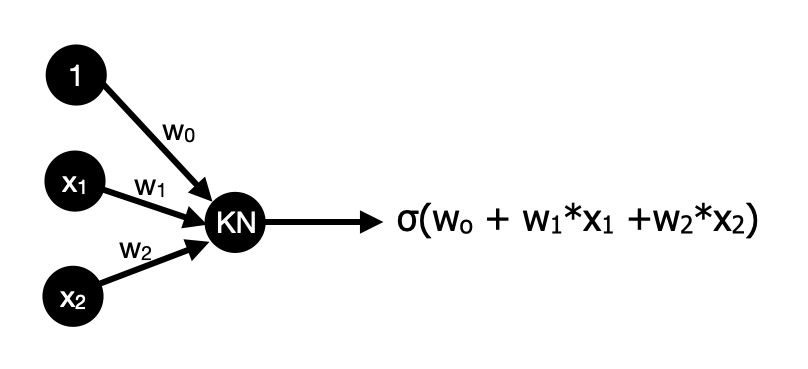

In [9]:
w0 = 3
w1 = -4
w2 = 2

def neuron_no_activation(x1, x2):
    sum = w0 + w1*x1  + w2 * x2
    return sum

In [10]:
neuron_no_activation(5.1, 3.5)

-10.399999999999999

### Activation Functions

- Die Funktion `centerAxis` zeichnet ein Koordinatenkreuz

In [11]:
def centerAxis(uses_negative=False):
    # http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    if uses_negative:
        ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

#centerAxis()

#### Aktivierungs Funktion **"Step Function"**:  
- abrupter, nicht stetig differenzierbarer Übergang zwischen 0 und 1

In [12]:
def np_step(X):
    return 0.5 * (np.sign(X) + 1)

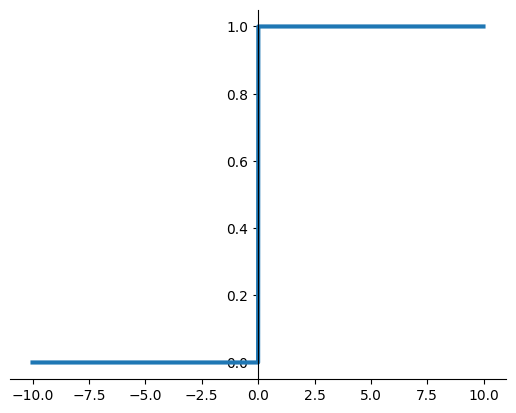

In [13]:
x = np.arange(-10,10,0.01)
y = np_step(x)

centerAxis()
plt.plot(x, y, lw=3)

#### Sigmoid Function: Fließender Übergang zwischen 0 und 1

In [14]:
def np_sigmoid(X):
    return 1 / (1 + np.exp(X * -1))

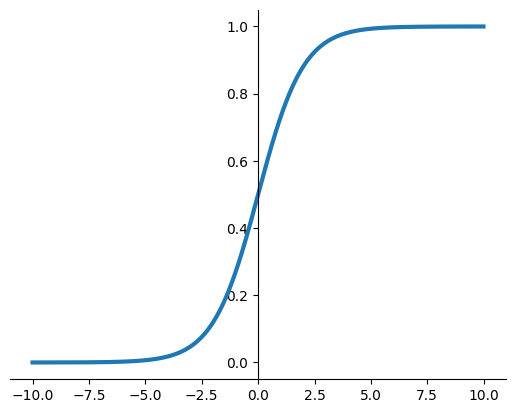

In [15]:
x = np.arange(-10,10,0.01)
y = np_sigmoid(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Tangens Hyperbolicus Function: Fließender Übergang zwischen -1 und 1

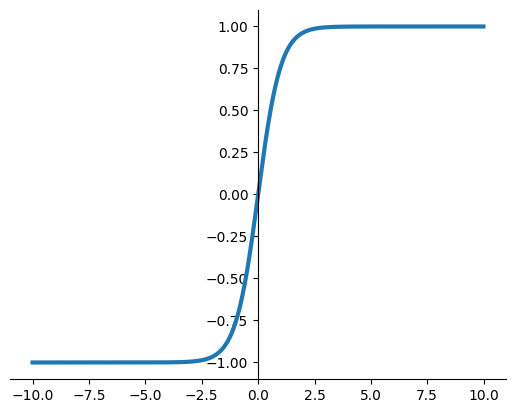

In [16]:
x = np.arange(-10,10,0.01)
y = np.tanh(x)

centerAxis()
plt.plot(x,y,lw=3)

#### Relu: Einfach zu berechnen, setzt kompletten negativen Wertebereich auf 0

In [17]:
def np_relu(x):
    return np.maximum(0, x)

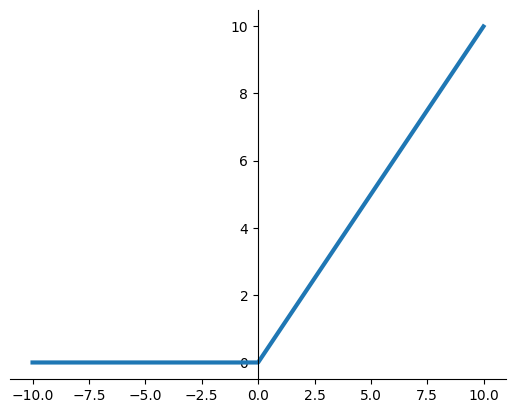

In [18]:
x = np.arange(-10,10,0.01)
y = np_relu(x)

centerAxis()
plt.plot(x,y,lw=3)

## Ein künstliches Neuron (from scratch)

In [19]:
# https://docs.python.org/3/library/math.html
import math as math
def sigmoid(x):
    return 1 / (1 + math.exp(x * -1))

w0 = 3 #bias
w1 = -4
w2 = 2

def neuron(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sigmoid(sum)

In [20]:
neuron(5.1, 3.5)

3.043155690056538e-05

## Iris mit Neuronalen Netzwerken

In [21]:
from sklearn.datasets import load_iris
iris = load_iris()

In [22]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [23]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

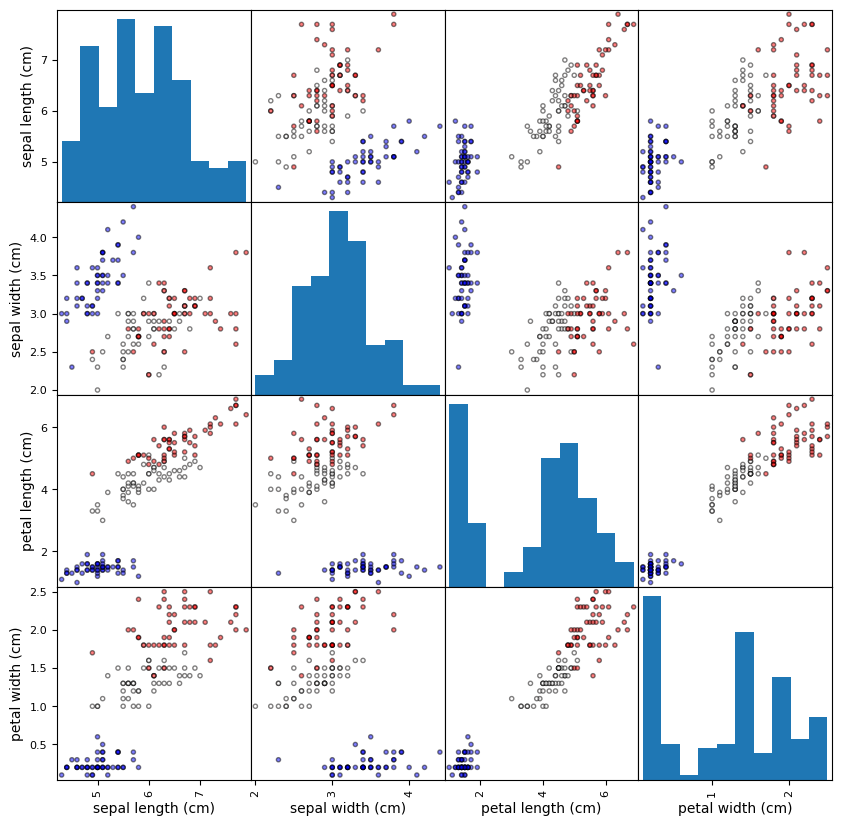

In [24]:
# Scattermatrix

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, cmap=CMAP, edgecolors='black', figsize=(10, 10))

In [25]:
# plt.savefig('ML_0701.png', bbox_inches='tight')

## Unser erste Neuronales Netz mit Keras
- die Inputschicht nimmt die 4 __Features__ als Eingabe
- diese werden jeweils unverändert an alle drei Neuronen der _Dense-Schicht_ weitergeleitet
- __Faustregel:__ Jedes Neuron kann eine Linie zu einer Decision-Boundary beitragen => wir können eine Art Dreieck abgrenzen
- __Dense__ oder "Fully Connected" drück aus, daß alle Neuronen voneinander unabhänging sind und alle die Eingaben der Vorherigen Schicht als Input bekommen und Ihre Ausgaben wiederum an alle Neuronen der nächsten Schicht weiterleiten
- Alle Layer die nicht zur Eingabe- oder Ausgabe-Schicht gehören werden als Hidden-Layer bezeichnet
- wir entwickeln ein "Feed Forward Netzwerk" in dem es _keine Schleifen_ nur einen direkten Weg von der _Eingabe_ zur _Ausgabe_ gibt. D.h die _Eingaben_ werden von der Eingabeschicht weiter Richtung Ausgabeschicht durchgeleitet


In [26]:
from keras.layers import Input
inputs = Input(shape=(4, ))

In [27]:
from keras.layers import Dense
fc = Dense(3)(inputs)

In [28]:
from keras.models import Model
model = Model(inputs=inputs, outputs=fc)

- Mit model.summary() lässt sich das Netzwerk Schichtweise zusammenfassen
- für die drei Neuronen kommen wir auf 15 Gewicht/Variablen welche optimiert werden sollen. Jeweils 4 Gewichte für die Verbindung zu den Eingaben und jeweils ein bias-Gewicht


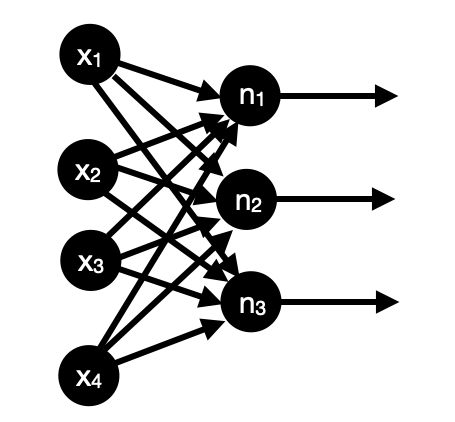

In [29]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

- Solch ein Model muss compiliert werden
- wir können damit bereits Vorhersagen machen. Allerdings ist das Model noch untrainiert

In [30]:
model.compile(optimizer='adam', # ähnlich wie Gradienten Methode
              loss='categorical_crossentropy', # Loss-Berechung
              metrics=['accuracy'])

Nun ist es bereits möglich Eingaben durch das NN zu leiten, das Modell ist aber noch untrainiert

In [31]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


array([[-3.5989525 , -2.4783936 , -0.36803046]], dtype=float32)

- Wir fügen noch eine Weiter Schicht als Ausgabe hinzu.
- Die Idee ist dabei das für jede Iris-Art ein Ausgabe-Neuron gibt.

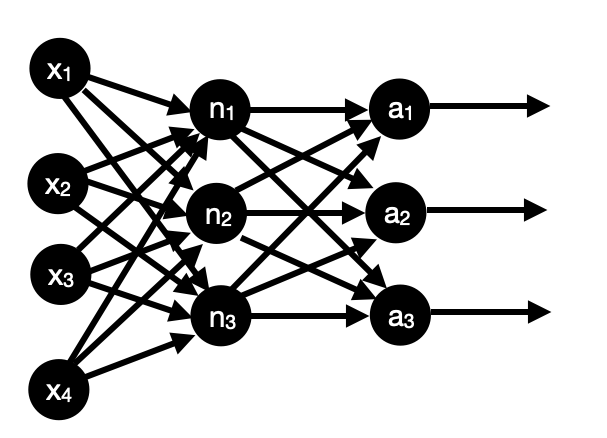

In [32]:
# Schreibweise  1
inputs = Input(shape=(4, ))
fc = Dense(3)(inputs)
predictions = Dense(3, activation='softmax')(fc)
model = Model(inputs=inputs, outputs=predictions)


In [33]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:

# alternative Schreibweise 1
'''
model = tf.keras.Sequential()
inputs = Input(shape=(4, ))
model.add(inputs)
model.add(Dense(3))# Fully connected layer
model.add(Dense(3, activation='softmax'))
'''



"\nmodel = tf.keras.Sequential()\ninputs = Input(shape=(4, ))\nmodel.add(inputs)\nmodel.add(Dense(3))# Fully connected layer\nmodel.add(Dense(3, activation='softmax'))\n"

In [35]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              15 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27 (108.00 B)

 Trainable params: 27 (108.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


array([[0.00330108, 0.9765345 , 0.02016439]], dtype=float32)

# Training

In [38]:
X = np.array(iris.data)
y = np.array(iris.target)
X.shape, y.shape

((150, 4), (150,))

Wir wollen unser Zielvariable binär codieren:  
0 => (1,0,0)   
1 => (0,1,0)  
2 => (0,0,1)
dazu verwenden wir die Funktion `to_categorical`


In [39]:
y[100]

np.int64(2)

In [40]:
#from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical # hier war ein Fehler im Ursprünglichen Script

num_categories = 3

y = to_categorical(y, num_categories)

In [50]:
y[100] # nun [0., 0., 1.] statt "2"

array([0., 0., 1.])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

## Data Training

In [53]:

%time model.fit(X_train, y_train, epochs=100, validation_split=0.3) # 0.20000000298023224
#%time model.fit(X_train, y_train, epochs=500, validation_split=0.3) # 0.9666666388511658
#%time model.fit(X_train, y_train, epochs=1000, validation_split=0.3) # 0.9666666388511658

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9665 - loss: 0.1464 - val_accuracy: 0.9722 - val_loss: 0.1026
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9587 - loss: 0.1527 - val_accuracy: 0.9722 - val_loss: 0.1025
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9665 - loss: 0.1494 - val_accuracy: 0.9722 - val_loss: 0.1031
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9704 - loss: 0.1421 - val_accuracy: 0.9722 - val_loss: 0.1039
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9743 - loss: 0.1295 - val_accuracy: 0.9722 - val_loss: 0.1041
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9548 - loss: 0.1557 - val_accuracy: 0.9722 - val_loss: 0.1053
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9782 - loss: 0.1395 - val_accuracy: 0.9722 - val_loss: 0.1054
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9626 - loss: 0.1393 - val_accuracy: 0.9722 - v

# Bewertung

In [51]:
X_train.shape
X_train[0]
y_train[0] # array([0., 0., 1.]) => 2


array([0., 0., 1.])

In [54]:
#prüfen:
model.predict(np.array([X_train[0] ]))
# epochs 500: array([[0.00110763, 0.3719631 , 0.6269292 ]], dtype=float32)
# epochs 1000: array([[4.5901030e-09, 1.1397284e-02, 9.8860264e-01]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[4.5901030e-09, 1.1397284e-02, 9.8860264e-01]], dtype=float32)

In [48]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
train_loss, train_accuracy

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9571 - loss: 0.2971 


(0.30101823806762695, 0.949999988079071)

In [49]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_loss, test_accuracy

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9667 - loss: 0.3007


(0.30065086483955383, 0.9666666388511658)